# Bonus Laboratoare - Theodor Moroianu - 334

## Laborator 1

In [2]:
# importam modulele necesare

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal as sg
import math
from scipy.ndimage.filters import gaussian_filter

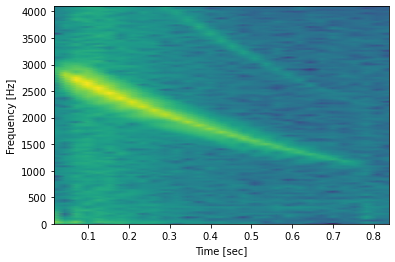

In [3]:
# afisam spectrograma

rate, x = wf.read('Lab1/sound.wav')
f,t,s = sg.spectrogram(x, fs=rate)

fig = plt.figure()

plt.pcolormesh(t, f, 10*np.log10(s), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Se pot observa clar doua sunete separata suprapuse:
 * Unul de la timpul $0$ la $0.8$ sec, de amplitudine ridicata si frecventa de la $3000$ la $1250$ Hz.
 * Altul de la timpul $0.3$ la $0.7$ sec, de amplitudine redusa si frecventa de la $4000$ la $2500$ Hz.

Putem aplica un sharpening peste imagine, scazand imaginea trecuta printr-un filtru gaussian, dupa care efectuam un threshold.

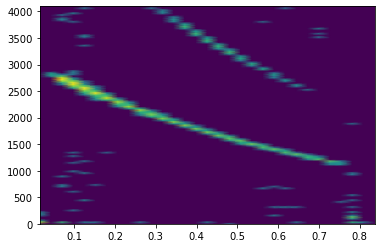

In [19]:
im = 10*np.log10(s)
im = im - 1.1 * gaussian_filter(im, sigma=3)

mid = (3 * np.max(im) + np.min(im)) / 4
im[im < mid] = 0


plt.pcolormesh(t, f, im, shading='gouraud')
plt.show()

Cele doua sunete sunt acum bine izolate. Le putem extrage cu ajutorul unei ferestre glisante de la stanga la dreapta (pe directia timpului).

## Laborator 2

Am citit 503 elemente. 24h * 7z * 3 sapt = 504


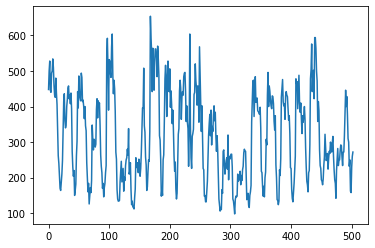

In [21]:
# importam modulele

import numpy as np
import matplotlib.pyplot as plt
import csv

# Citim datele
with open('Lab2/trafic.csv') as fin:
    reader = csv.reader(fin)
    data = np.array(list(reader))
    data = data[1:]
    data = [int(i) for i in data]

# Afisari de verificare
print(f"Am citit {len(data)} elemente. 24h * 7z * 3 sapt = {24 * 7 * 3}")
plt.plot(data)
plt.show()

Datele pentru 3 zile ne-procesate:


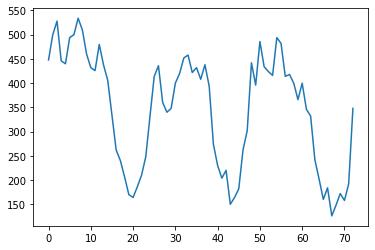

In [22]:
raw_3d = data[:24 * 3 + 1]
print(f"Datele pentru 3 zile ne-procesate:")
plt.plot(raw_3d)
plt.show()

Clean signal:


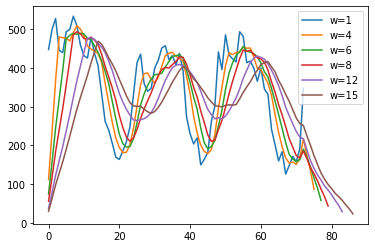

In [35]:
# filtru de netezire
def clean_signal(signal, strength):
    return np.convolve(signal, np.ones(strength)) / strength

strengths = [1, 4, 6, 8, 12, 15]
clean_3d = [clean_signal(raw_3d, i) for i in strengths]
print("Clean signal:")
for i in clean_3d:
    plt.plot(i)
plt.legend([f"w={i}" for i in strengths])
# plt.plot(clean_3d) #,# ["Smooth 2", 'sd', 'd', 'ff'])
plt.show()

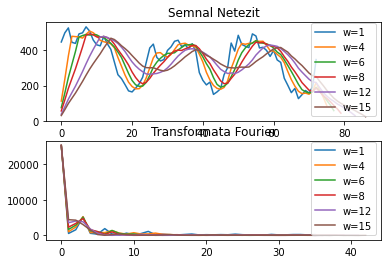

In [24]:
# Transformata Fourier
def compute_fft(semnal):
    fft = np.fft.fft(semnal)
    fft = fft[: len(fft) // 2]
    fft = np.abs(fft)
    return fft

fft = [compute_fft(i) for i in clean_3d]


fig, axes = plt.subplots(ncols=1, nrows=2)

for i in clean_3d:
    axes[0].plot(i)
axes[0].set_title("Semnal Netezit")
axes[0].legend([f"w={i}" for i in strengths])

for i in fft:
    axes[1].plot(i)

axes[1].legend([f"w={i}" for i in strengths])
axes[1].set_title("Transformata Fourier")
plt.show()

## Laborator 3

Laboratorul 3 nu are exercitiu bonus :(

## Laborator 4

In [29]:
# Exercitiul 2.c (bonus) 

# Definesc tipurile de fereastra.

def dreptunghiular(N):
    a = np.ones((N,))
    return a / a.sum()

def hanning(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.5 * (1 - np.cos(points))
    return a / a.sum()
    
def hamming(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.54 - 0.46 * np.cos(points)
    return a / a.sum()

def blackman(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.42 - 0.5 * np.cos(points) + 0.08 * np.cos(2 * points)
    return a / a.sum()

def flat_top(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = (0.22 -
        0.42 * np.cos(points) +
        0.28 * np.cos(2 * points) -
        0.08 * np.cos(2 * points) +
        0.007 * np.cos(4 * points))
    return a / a.sum()

def unit(N):
    return np.zeros((N,))

def compute_graph(fn, N):
    points = fn(N)
    zeros = np.zeros((N // 3,))
    points = np.concatenate([zeros, points, zeros])
    return points

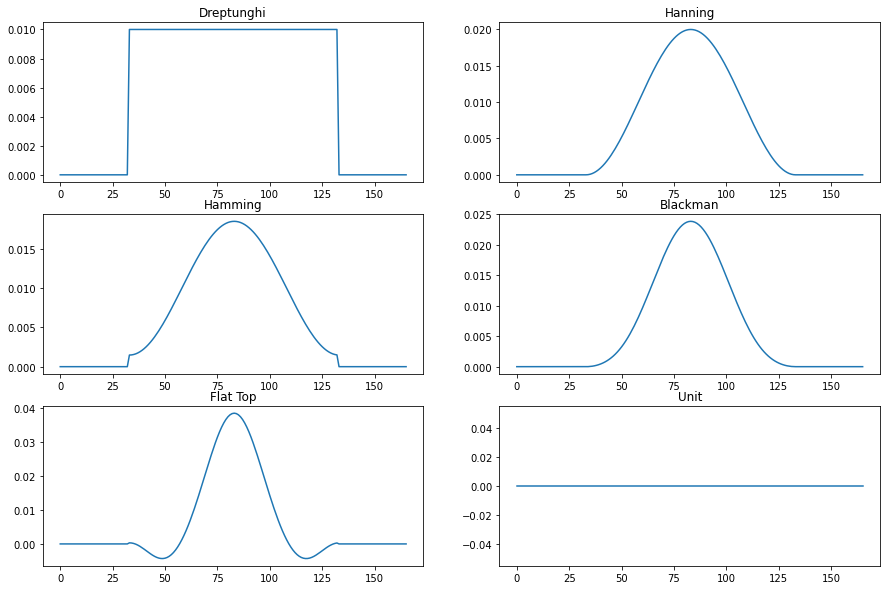

In [30]:
fig, axs = plt.subplots(3, 2)

N = 100


axs[0, 0].plot(compute_graph(dreptunghiular, N))
axs[0, 0].set_title('Dreptunghi')
axs[0, 1].plot(compute_graph(hanning, N))
axs[0, 1].set_title('Hanning')
axs[1, 0].plot(compute_graph(hamming, N))
axs[1, 0].set_title("Hamming")
axs[1, 1].plot(compute_graph(blackman, N))
axs[1, 1].set_title('Blackman')
axs[2, 0].plot(compute_graph(flat_top, N))
axs[2, 0].set_title('Flat Top')
axs[2, 1].plot(compute_graph(unit, N))
axs[2, 1].set_title('Unit')

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

## Laborator 5

Nici laboratorul 5 nu are bonus :(